# Importing Data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('fake_or_real_news.csv')

In [4]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Preprocessing

In [5]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
#df = df.fillna('')

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [10]:
df = df.drop(['title', 'Unnamed: 0'], axis=1)

In [11]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


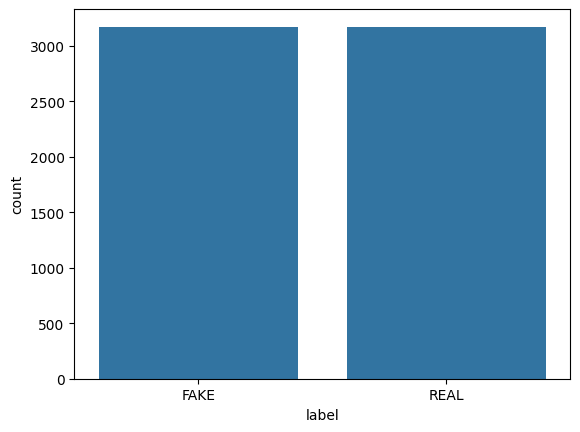

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = df , x="label")
plt.show()

In [14]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [15]:
df['word count'] = df['text'].apply(no_of_words)

In [16]:
df.head()

,text,label,word count
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404
4,It's primary day in New York and front-runners...,REAL,317


In [20]:

from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

### by above graph we can get that the data is imbalanced

# Text Processing

In [22]:
import re

In [24]:
from nltk.corpus import stopwords

In [25]:
from nltk.stem import PorterStemmer

In [26]:
port_stem = PorterStemmer()

In [27]:
def stemming(content):
    con = re.sub('[^A-Za-z]', ' ', content)
    con = con.lower()
    con = con.split()
    con = [port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con = ' '.join(con)
    return con

In [28]:
stemming("Hi THis is marium!")

'hi marium'

In [29]:
df['text'] = df['text'].apply(stemming)

In [30]:
X = df['text']

In [31]:
y = df['label']

In [32]:
y.shape

(6335,)

# Model training

## Testing one model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vect = TfidfVectorizer()

In [37]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [38]:
X_test.shape

(1267, 39611)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
prediction = model.predict(X_test)

In [42]:
prediction

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
model.score(X_test, y_test)

0.8145224940805051

## Now use more models for classification to get best accuracy

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
class TextClassifier:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.vectorizer = TfidfVectorizer()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_models(self):
        
        models = [
            DecisionTreeClassifier(),
            RandomForestClassifier(n_estimators=100),
            SVC(kernel='linear', C=1),
            MultinomialNB(),
            KNeighborsClassifier(n_neighbors=5),
            GradientBoostingClassifier(n_estimators=100)
        ]

        results = {}

        for model in models:
            model_name = model.__class__.__name__
            X_train_tfidf = self.vectorizer.fit_transform(self.X_train)
            X_test_tfidf = self.vectorizer.transform(self.X_test)

            model.fit(X_train_tfidf, self.y_train)
            y_pred = model.predict(X_test_tfidf)
            accuracy = accuracy_score(self.y_test, y_pred)

            results[model_name] = accuracy

        return results




classifier = TextClassifier(df['text'], df['label'])
results = classifier.train_models()


for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}%")

DecisionTreeClassifier: 0.81%
RandomForestClassifier: 0.91%
SVC: 0.94%
MultinomialNB: 0.84%
KNeighborsClassifier: 0.61%
GradientBoostingClassifier: 0.89%


### Hence the SVC model performs better than others then we will move furthur with this model

In [46]:
best_model = SVC(kernel='linear', C=1)

In [47]:
best_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [48]:
y_pred = best_model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9376479873717443

In [50]:
import pickle

In [51]:
pickle.dump(vect, open('vector.pkl', 'wb'))

In [52]:
pickle.dump(best_model, open('best_model.pkl', 'wb'))

In [53]:
vector_form = pickle.load(open('vector.pkl', 'rb'))

In [54]:
load_model = pickle.load(open('best_model.pkl', 'rb'))

In [55]:
def fake_news(news):
    news = stemming(news)
    input_data = [news]
    vector_form1 = vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)

    return prediction

In [56]:
val = fake_news(df['text'][2])

In [57]:
if val == 0:
    print('Fake')
else:
    print('Real')

Real
